# Analyse TF-IDF du df_final

1. **Réaliser un TF-IDF** sur l'ensemble des `cases_texte` du `df_final`.
2. **Tenter de prédire** la colonne `major_mesh_terms` à partir du TF-IDF.

In [1]:
import os
import pandas as pd
import numpy as np

In [12]:
df = pd.read_parquet('data/df_final')
df_metadata = pd.read_parquet('data/df_metadata')

In [16]:
import os
import s3fs

# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

BUCKET_OUT = "s3://quentin1999/Data_Projet_NLP"
FILE_KEY_OUT_S3 = "df_final"
FILE_PATH_OUT_S3 = BUCKET_OUT + "/" + FILE_KEY_OUT_S3

with fs.open(FILE_PATH_OUT_S3, 'w') as file_out:
    df.to_csv(file_out)

In [17]:
BUCKET_OUT = "s3://quentin1999/Data_Projet_NLP"
FILE_KEY_OUT_S3 = "df_metadata"
FILE_PATH_OUT_S3 = BUCKET_OUT + "/" + FILE_KEY_OUT_S3

with fs.open(FILE_PATH_OUT_S3, 'w') as file_out:
    df_metadata.to_csv(file_out)

## Afficher nuage de mot avec WordCloud

In [3]:
text_brut = str(df['case_text'])

In [4]:
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')


#stop_words = set(stopwords.words('english'))
#text_brut = [word for word in text_brut if word not in stop_words]

[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

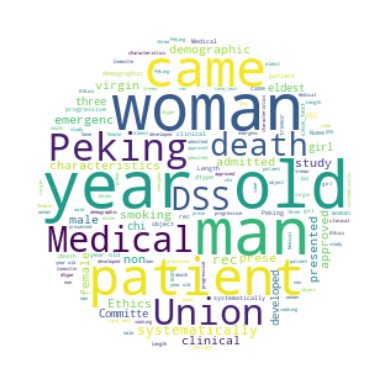

In [5]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes


STOPWORDS = set(stopwords.words('english'))

import matplotlib.pyplot as plt
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# plot a word cloud
text = str(df['case_text'])
wc = WordCloud(background_color="white", repeat=True, mask=mask, stopwords = STOPWORDS)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

## Bag-of-word representation

In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset, create X (features) and y (target), print the size
data_train, data_dev_test = train_test_split(df ,test_size=0.20, random_state=42)
data_dev, data_test = train_test_split(data_dev_test ,test_size=0.5, random_state=42)

print ('train size',data_train.shape)
print ('dev size', data_dev.shape)
print ('test size', data_test.shape)
# create features X and target y
X_train = data_train.text
X_dev = data_dev.text
X_test = data_test.text
y_train = data_train.category
y_dev = data_dev.category
y_test = data_test.category

ModuleNotFoundError: No module named 'sklearn'